In [158]:
import pandas as pd
df=pd.read_csv('Nike Dataset.csv')
df

,Invoice Date,Product,Region,Retailer,Sales Method,State,Price per Unit,Total Sales,Units Sold
0,01-01-2020,Men's Street Footwear,Northeast,Foot Locker,In-store,New York,50,6000,120
1,02-01-2020,Men's Athletic Footwear,Northeast,Foot Locker,In-store,New York,50,5000,100
2,03-01-2020,Women's Street Footwear,Northeast,Foot Locker,In-store,New York,40,4000,100
3,04-01-2020,Women's Athletic Footwear,Northeast,Foot Locker,In-store,New York,45,3825,85
4,05-01-2020,Men's Apparel,Northeast,Foot Locker,In-store,New York,60,5400,90
...,...,...,...,...,...,...,...,...,...
9355,06-07-2021,Women's Athletic Footwear,West,West Gear,Outlet,Idaho,38,60,16
9356,05-04-2021,Women's Street Footwear,West,West Gear,Outlet,Idaho,19,31,16
9357,05-05-2021,Women's Street Footwear,West,West Gear,Outlet,Idaho,18,33,18
9358,04-06-2021,Women's Street Footwear,West,West Gear,Outlet,Idaho,34,63,19


In [159]:
df.dtypes

Invoice Date      object
Product           object
Region            object
Retailer          object
Sales Method      object
State             object
Price per Unit     int64
Total Sales        int64
Units Sold         int64
dtype: object

In [160]:
df.columns

Index(['Invoice Date', 'Product', 'Region', 'Retailer', 'Sales Method',
       'State', 'Price per Unit', 'Total Sales', 'Units Sold'],
      dtype='object')

In [161]:
df.duplicated().sum()

np.int64(0)

In [162]:
df.isna().sum()

Invoice Date      0
Product           0
Region            0
Retailer          0
Sales Method      0
State             0
Price per Unit    0
Total Sales       0
Units Sold        0
dtype: int64

In [163]:
df.describe()

,Price per Unit,Total Sales,Units Sold
count,9360.000000,9360.00000,9360.000000
mean,44.739209,921.93109,25.852991
std,14.506338,1413.84279,21.591922
min,7.000000,0.00000,0.000000
25%,35.000000,42.00000,11.000000
50%,45.000000,95.00000,18.000000
75%,55.000000,1463.00000,35.000000
max,110.000000,8250.00000,128.000000


IQR method

In [164]:
import datetime as dt
dict1={}
for i in df:
  if df[i].dtype in ['int32','int64','float64']:
    dict1[i]={}
    dict1[i]['Q1']=df[i].quantile(0.25)
    dict1[i]['Q3']=df[i].quantile(0.75)
    dict1[i]['IQR']=dict1[i]['Q3']-dict1[i]['Q1']
    dict1[i]['Min range']=dict1[i]['Q1']-1.5*dict1[i]['IQR']
    dict1[i]['Max range']=dict1[i]['Q3']+1.5*dict1[i]['IQR']
dict1

{'Price per Unit': {'Q1': np.float64(35.0),
  'Q3': np.float64(55.0),
  'IQR': np.float64(20.0),
  'Min range': np.float64(5.0),
  'Max range': np.float64(85.0)},
 'Total Sales': {'Q1': np.float64(42.0),
  'Q3': np.float64(1463.0),
  'IQR': np.float64(1421.0),
  'Min range': np.float64(-2089.5),
  'Max range': np.float64(3594.5)},
 'Units Sold': {'Q1': np.float64(11.0),
  'Q3': np.float64(35.0),
  'IQR': np.float64(24.0),
  'Min range': np.float64(-25.0),
  'Max range': np.float64(71.0)}}

FEATURE ENGINEERING

Created a new column 'gender' and extracted from product name

In [165]:
df['Gender']=df['Product'].apply(lambda x:x.split("'")[0])


In [166]:
col=[0,1,-1,2,3,4,5,6,7,8]
df=df.iloc[:,col]

Created a new column 'year' and extracted it from Invoice date using split

In [167]:
df['Year']=df['Invoice Date'].apply(lambda x:x.split('-')[-1])

C:\Users\anson\AppData\Local\Temp\ipykernel_11304\1904142619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year']=df['Invoice Date'].apply(lambda x:x.split('-')[-1])


In [168]:
col=[0,-1,1,2,3,4,5,6,7,8]
df=df.iloc[:,col]

In [169]:
df['Year']=df['Year'].astype(int)

Created a new column 'price in indian rupees' and converted it from another column 'price per unit' by converting dollar to indian rupees

In [170]:
df['Price in Indian Ruppees']=df['Price per Unit'].apply(lambda x:x*87.34)

In [171]:
df.columns

Index(['Invoice Date', 'Year', 'Product', 'Gender', 'Region', 'Retailer',
       'Sales Method', 'State', 'Price per Unit', 'Total Sales',
       'Price in Indian Ruppees'],
      dtype='object')

In [172]:
col=[0,1,2,3,4,5,6,7,-1,8,9]
df=df.iloc[:,col]

In [173]:
col=[0,1,2,3,4,5,6,7,9,8,10]
df=df.iloc[:,col]

Created a new column 'Product_category' extracted from product name

In [174]:
df['Product_category']=df['Product'].apply(lambda x:x.split()[-1])
df['Product_category'].unique()

array(['Footwear', 'Apparel'], dtype=object)

In [175]:
col=[0,1,2,-1,3,4,5,6,7,8,9,10]
df=df.iloc[:,col]

Converted the datatype of the column 'Invoice Date' to datetime

In [176]:
df['Invoice Date']=pd.to_datetime(df['Invoice Date'],format='%d-%m-%Y')

In [198]:
df['Year']=df['Invoice Date'].dt.year # to extract year
df['Month Name']=df['Invoice Date'].dt.month_name() # to extract month name
df['Day Name']=df['Invoice Date'].dt.day_name() # to extract day name
df['Month']=df['Invoice Date'].dt.month


In [178]:
col=[0,-1,-2,1,2,3,4,5,6,7,8,9,10,11]
df=df.iloc[:,col]

In [179]:
df['Month']=df['Invoice Date'].dt.month

In [202]:
df.columns

Index(['Invoice Date', 'Month', 'Day Name', 'Year', 'Product',
       'Product_category', 'Gender', 'Region', 'Retailer', 'Sales Method',
       'State', 'Price per Unit', 'Price in Indian Ruppees', 'Total Sales',
       'Total Amount', 'Price_category', 'Month Name'],
      dtype='object')

created a new column 'Price category' from the column 'Price in Indian Rupees' 

In [ ]:
df['Price_category']=df['Price in Indian Ruppees'].apply(lambda x:'Budget-friendly' if x<1000 
                                                        else 'Affordable' if 1000<=x<3000 
                                                        else 'Mid-range' if 3000<=x<7000 
                                                        else 'Premium' if 7000<=x<15000 
                                                        else 'Luxury')

Created a new column 'Total Amount' by multiplying the total sale and price per unit

In [182]:
df['Total Amount']=df['Total Sales']*df['Price per Unit']


df.rename(columns={'Total':'Total Amount'},inplace=True)

Removing the rows in the total sale is zero

In [183]:
df.drop(index=df[df['Total Sales']==0].index,inplace=True)

Text(0, 0.5, 'Number of sales')

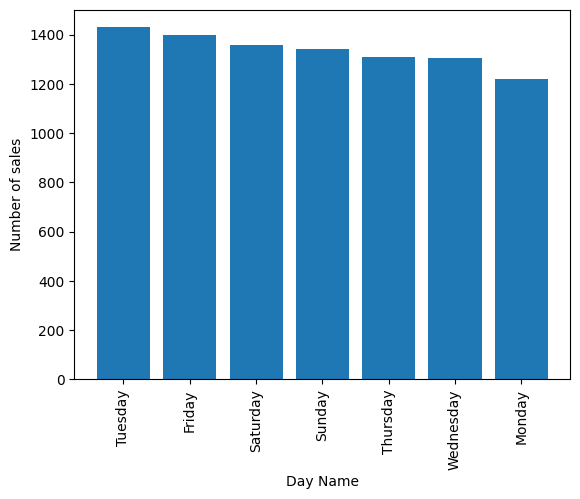

In [184]:
import matplotlib.pyplot as plt
x=df['Day Name'].value_counts().index
y=df['Day Name'].value_counts()
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('Day Name')
plt.ylabel('Number of sales')

In [185]:
df['Gender'].value_counts()

Gender
Men      4680
Women    4676
Name: count, dtype: int64

Average price of same product in different state

In [186]:
df['Product'].unique()

array(["Men's Street Footwear", "Men's Athletic Footwear",
       "Women's Street Footwear", "Women's Athletic Footwear",
       "Men's Apparel", "Women's Apparel"], dtype=object)

In [187]:
b=df.groupby(['Product','State'])[['Price per Unit']].mean().sort_values(by=['Product','Price per Unit'],ascending=[True,False])
b.loc[["Men's Street Footwear"]]

Price per Unit
Product               State                         
Men's Street Footwear Washington           62.583333
                      New Hampshire        55.916667
                      Florida              54.916667
                      Colorado             53.208333
                      Pennsylvania         52.250000
                      Vermont              51.500000
                      Maine                50.250000
                      New York             50.083333
                      Delaware             49.416667
                      South Carolina       49.375000
                      Illinois             49.125000
                      Nevada               48.944444
                      Oregon               48.083333
                      Virginia             47.666667
                      Massachusetts        47.083333
                      Maryland             46.833333
                      New Jersey           46.583333
                      South Dakota         46.500000
                      Ohio                 46.041667
                      Louisiana            46.027778
                      North Carolina       45.833333
                      Connecticut          45.694444
                      Michigan             45.375000
                      Kentucky             45.208333
                      New Mexico           45.083333
                      Wyoming              44.875000
                      California           44.250000
                      Minnesota            43.625000
                      West Virginia        43.166667
                      Rhode Island         42.583333
                      Georgia              42.444444
                      North Dakota         41.916667
                      Arizona              40.944444
                      Indiana              40.916667
                      Kansas               39.958333
                      Wisconsin            39.541667
                      Iowa                 38.958333
                      Nebraska             38.791667
                      Montana              38.375000
                      Mississippi          36.361111
                      Texas                34.541667
                      Missouri             34.416667
                      Oklahoma             34.388889
                      Arkansas             34.277778
                      Idaho                34.111111
                      Tennessee            31.111111
                      Alabama              30.861111
                      Utah                 28.777778

In [188]:
df[df['Total Sales']==0]

,Invoice Date,Month,Day Name,Year,Product,Product_category,Gender,Region,Retailer,Sales Method,State,Price per Unit,Price in Indian Ruppees,Total Sales,Price_category,Total Amount


In [189]:
# df['Price in Indian Rupees'].max()

In [190]:
col=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,-1,14]
df=df.iloc[:,col]

In [191]:
df

,Invoice Date,Month,Day Name,Year,Product,Product_category,Gender,Region,Retailer,Sales Method,State,Price per Unit,Price in Indian Ruppees,Total Sales,Total Amount,Price_category
0,2020-01-01,1,Wednesday,2020,Men's Street Footwear,Footwear,Men,Northeast,Foot Locker,In-store,New York,50,4367.00,6000,300000,Mid-range
1,2020-01-02,1,Thursday,2020,Men's Athletic Footwear,Footwear,Men,Northeast,Foot Locker,In-store,New York,50,4367.00,5000,250000,Mid-range
2,2020-01-03,1,Friday,2020,Women's Street Footwear,Footwear,Women,Northeast,Foot Locker,In-store,New York,40,3493.60,4000,160000,Mid-range
3,2020-01-04,1,Saturday,2020,Women's Athletic Footwear,Footwear,Women,Northeast,Foot Locker,In-store,New York,45,3930.30,3825,172125,Mid-range
4,2020-01-05,1,Sunday,2020,Men's Apparel,Apparel,Men,Northeast,Foot Locker,In-store,New York,60,5240.40,5400,324000,Mid-range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,2021-07-06,7,Tuesday,2021,Women's Athletic Footwear,Footwear,Women,West,West Gear,Outlet,Idaho,38,3318.92,60,2280,Mid-range
9356,2021-04-05,4,Monday,2021,Women's Street Footwear,Footwear,Women,West,West Gear,Outlet,Idaho,19,1659.46,31,589,Affordable
9357,2021-05-05,5,Wednesday,2021,Women's Street Footwear,Footwear,Women,West,West Gear,Outlet,Idaho,18,1572.12,33,594,Affordable
9358,2021-06-04,6,Friday,2021,Women's Street Footwear,Footwear,Women,West,West Gear,Outlet,Idaho,34,2969.56,63,2142,Affordable


In [192]:
# a=df.groupby(['Month Name','Month','Category'])[['Price per Unit']].mean()
# a.sort_values(by='Month',ascending=True)

In [193]:
df.dtypes

Invoice Date               datetime64[ns]
Month                               int32
Day Name                           object
Year                                int32
Product                            object
Product_category                   object
Gender                             object
Region                             object
Retailer                           object
Sales Method                       object
State                              object
Price per Unit                      int64
Price in Indian Ruppees           float64
Total Sales                         int64
Total Amount                        int64
Price_category                     object
dtype: object

Visualization

Text(0.5, 1.0, 'Variation of price in each year')

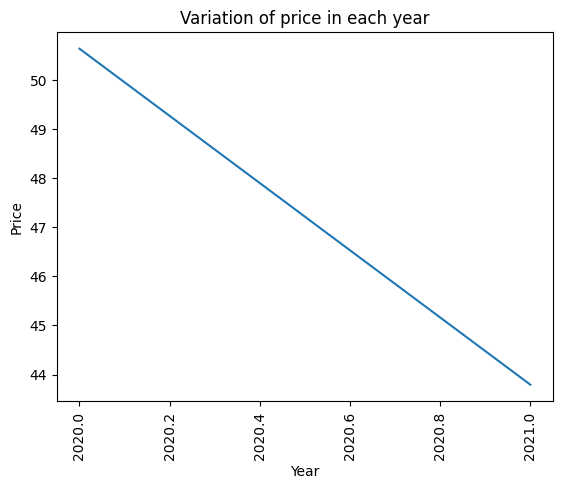

In [194]:
plt.plot(df.groupby('Year')['Price per Unit'].mean())
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Variation of price in each year')

Text(0.5, 1.0, 'Total sales in each days')

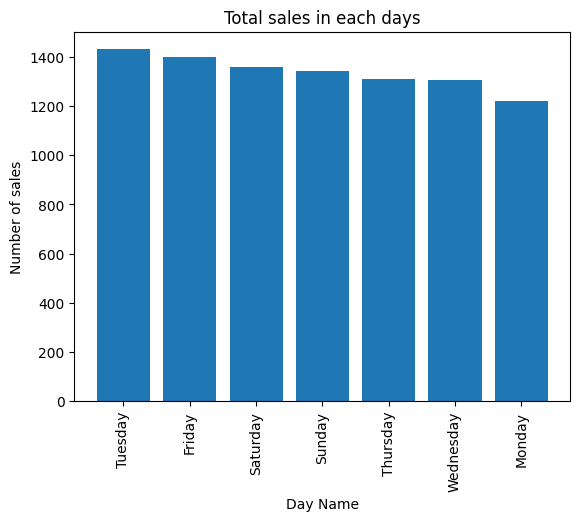

In [195]:
import matplotlib.pyplot as plt
x=df['Day Name'].value_counts().index
y=df['Day Name'].value_counts()
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('Day Name')
plt.ylabel('Number of sales')
plt.title('Total sales in each days')


In [197]:
df

,Invoice Date,Month,Day Name,Year,Product,Product_category,Gender,Region,Retailer,Sales Method,State,Price per Unit,Price in Indian Ruppees,Total Sales,Total Amount,Price_category
0,2020-01-01,1,Wednesday,2020,Men's Street Footwear,Footwear,Men,Northeast,Foot Locker,In-store,New York,50,4367.00,6000,300000,Mid-range
1,2020-01-02,1,Thursday,2020,Men's Athletic Footwear,Footwear,Men,Northeast,Foot Locker,In-store,New York,50,4367.00,5000,250000,Mid-range
2,2020-01-03,1,Friday,2020,Women's Street Footwear,Footwear,Women,Northeast,Foot Locker,In-store,New York,40,3493.60,4000,160000,Mid-range
3,2020-01-04,1,Saturday,2020,Women's Athletic Footwear,Footwear,Women,Northeast,Foot Locker,In-store,New York,45,3930.30,3825,172125,Mid-range
4,2020-01-05,1,Sunday,2020,Men's Apparel,Apparel,Men,Northeast,Foot Locker,In-store,New York,60,5240.40,5400,324000,Mid-range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,2021-07-06,7,Tuesday,2021,Women's Athletic Footwear,Footwear,Women,West,West Gear,Outlet,Idaho,38,3318.92,60,2280,Mid-range
9356,2021-04-05,4,Monday,2021,Women's Street Footwear,Footwear,Women,West,West Gear,Outlet,Idaho,19,1659.46,31,589,Affordable
9357,2021-05-05,5,Wednesday,2021,Women's Street Footwear,Footwear,Women,West,West Gear,Outlet,Idaho,18,1572.12,33,594,Affordable
9358,2021-06-04,6,Friday,2021,Women's Street Footwear,Footwear,Women,West,West Gear,Outlet,Idaho,34,2969.56,63,2142,Affordable


In [196]:
import matplotlib.pyplot as plt
x=df['Month Name'].value_counts().index
y=df['Month Name'].value_counts()
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('Month Name')
plt.ylabel('Number of sales')
plt.title('Bar graph of total sales in each days')

KeyError: 'Month Name'

Text(0.5, 1.0, 'Bar graph of total sales in each month')

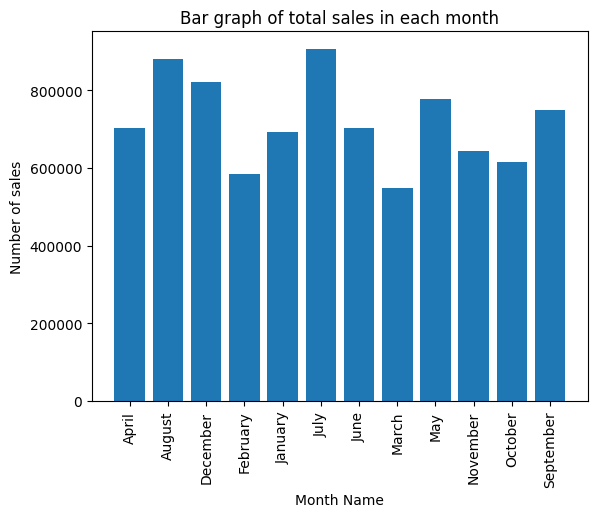

In [ ]:
y=df.groupby('Month Name')['Total Sales'].sum()
x=y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('Month Name')
plt.ylabel('Number of sales')
plt.title('Bar graph of total sales in each month')

In [ ]:
print(len(df.columns))
df.columns

17


Index(['Invoice Date', 'Day Name', 'Month Name', 'Month', 'Year', 'Product',
       'Product_category', 'Gender', 'Region', 'Retailer', 'Sales Method',
       'State', 'Price per Unit', 'Price in Indian Rupees', 'Price_category',
       'Total Sales', 'Total Amount'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x1c6fd5b0560>,
 'caps': [<matplotlib.lines.Line2D at 0x1c6fd5b0bc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c6fd5936b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c6fd5b11c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c6fd5b14c0>],
 'means': []}

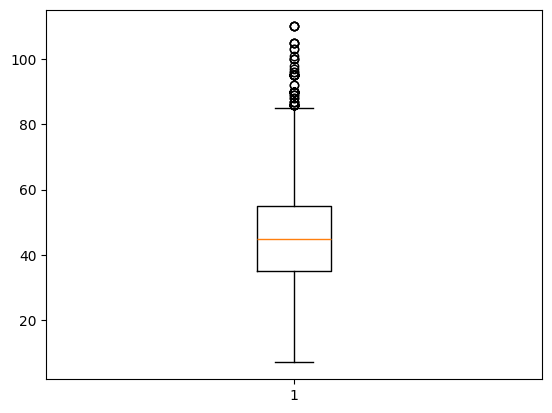

In [ ]:
plt.boxplot(df['Price per Unit'])

Text(0, 0.5, 'Total sales')

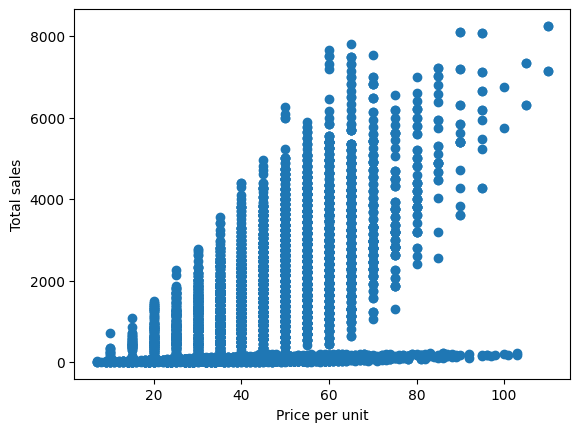

In [ ]:
plt.scatter(df['Price per Unit'],df['Total Sales'])
plt.xlabel('Price per unit')
plt.ylabel('Total sales')

([0, 1, 2],
 [Text(0, 0, 'In-store'), Text(1, 0, 'Outlet'), Text(2, 0, 'Online')])

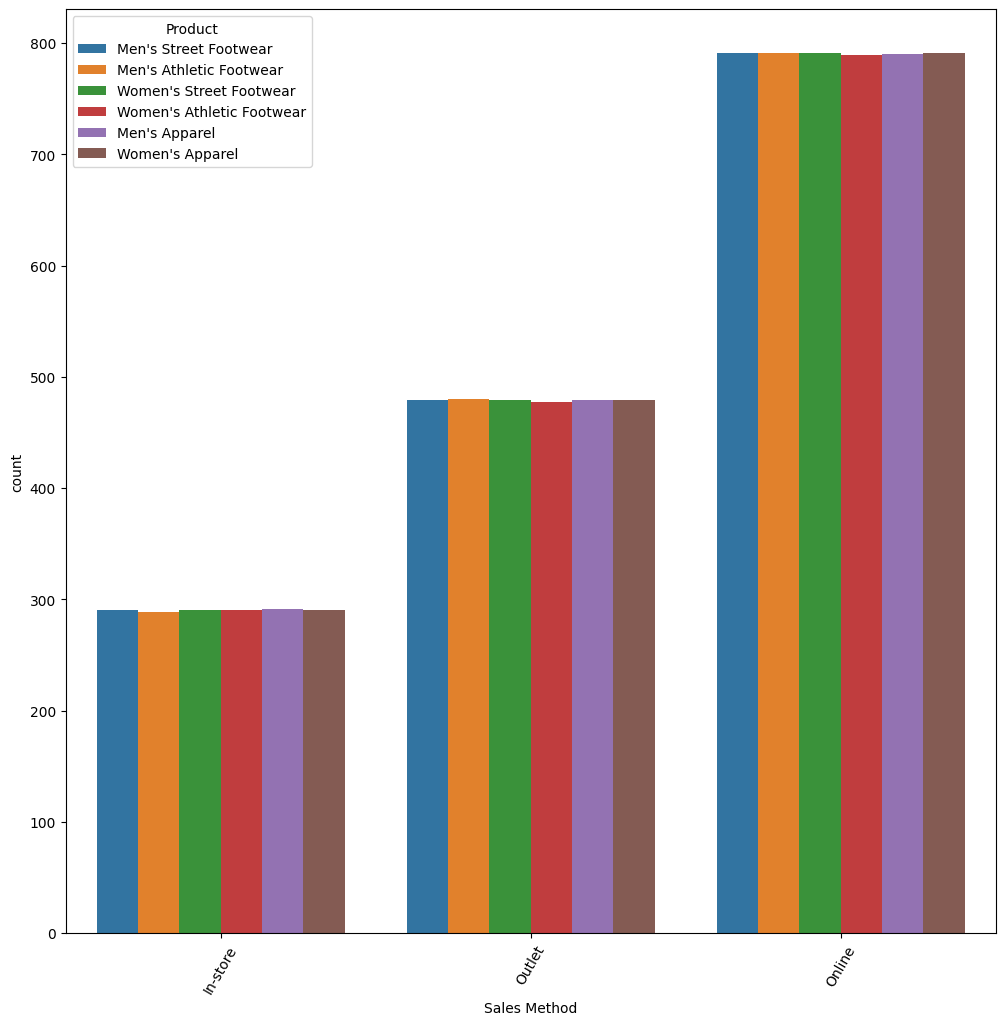

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
sns.countplot(x=df['Sales Method'],hue=df['Product'])
plt.xticks(rotation=60)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Foot Locker'),
  Text(1, 0, 'Walmart'),
  Text(2, 0, 'Sports Direct'),
  Text(3, 0, 'West Gear'),
  Text(4, 0, "Kohl's"),
  Text(5, 0, 'Amazon')])

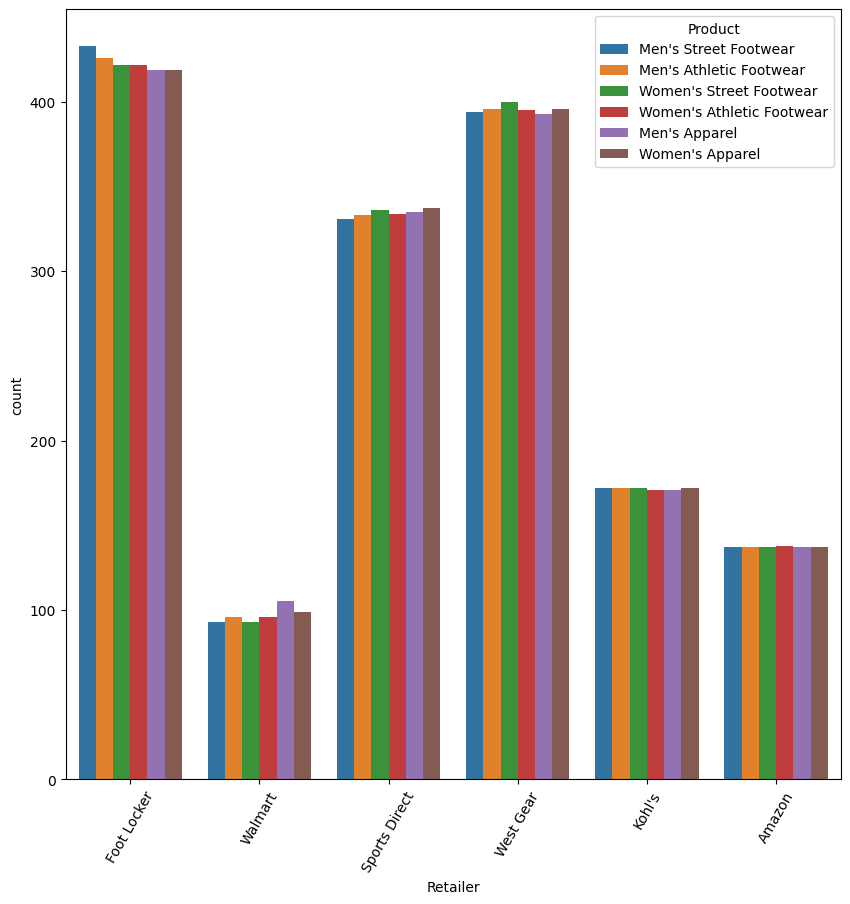

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.countplot(x=df['Retailer'],hue=df['Product'])
plt.xticks(rotation=60)

In [ ]:
df.columns

Index(['Invoice Date', 'Day Name', 'Month Name', 'Month', 'Year', 'Product',
       'Product_category', 'Gender', 'Region', 'Retailer', 'Sales Method',
       'State', 'Price per Unit', 'Price in Indian Rupees', 'Price_category',
       'Total Sales', 'Total Amount'],
      dtype='object')

Text(0.5, 1.0, 'Count plot of each regions')

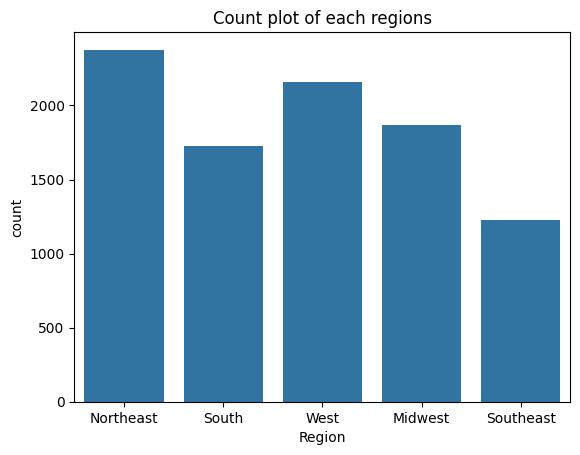

In [ ]:
sns.countplot(x=df['Region'])
plt.title("Count plot of each regions")

(array([2376.,    0., 1728.,    0.,    0., 2160.,    0., 1868.,    0.,
        1224.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

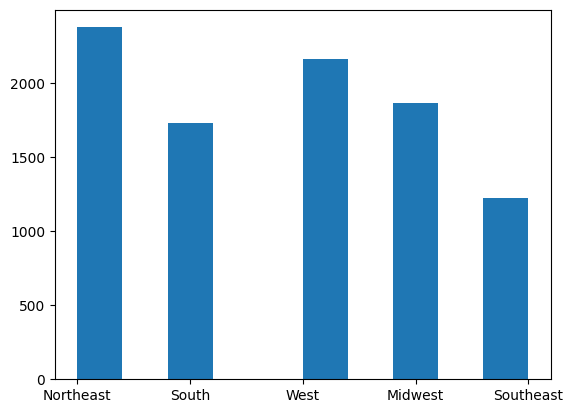

In [ ]:
plt.hist(df['Region'])


In [ ]:
df.corr(numeric_only=True)

,Month,Year,Price per Unit,Price in Indian Rupees,Total Sales,Total Amount
Month,1.000000,0.041944,0.250316,0.250316,0.040958,0.066171
Year,0.041944,1.000000,-0.163114,-0.163114,-0.135411,-0.135274
Price per Unit,0.250316,-0.163114,1.000000,1.000000,0.435545,0.525696
Price in Indian Rupees,0.250316,-0.163114,1.000000,1.000000,0.435545,0.525696
Total Sales,0.040958,-0.135411,0.435545,0.435545,1.000000,0.960300
Total Amount,0.066171,-0.135274,0.525696,0.525696,0.960300,1.000000


<Axes: >

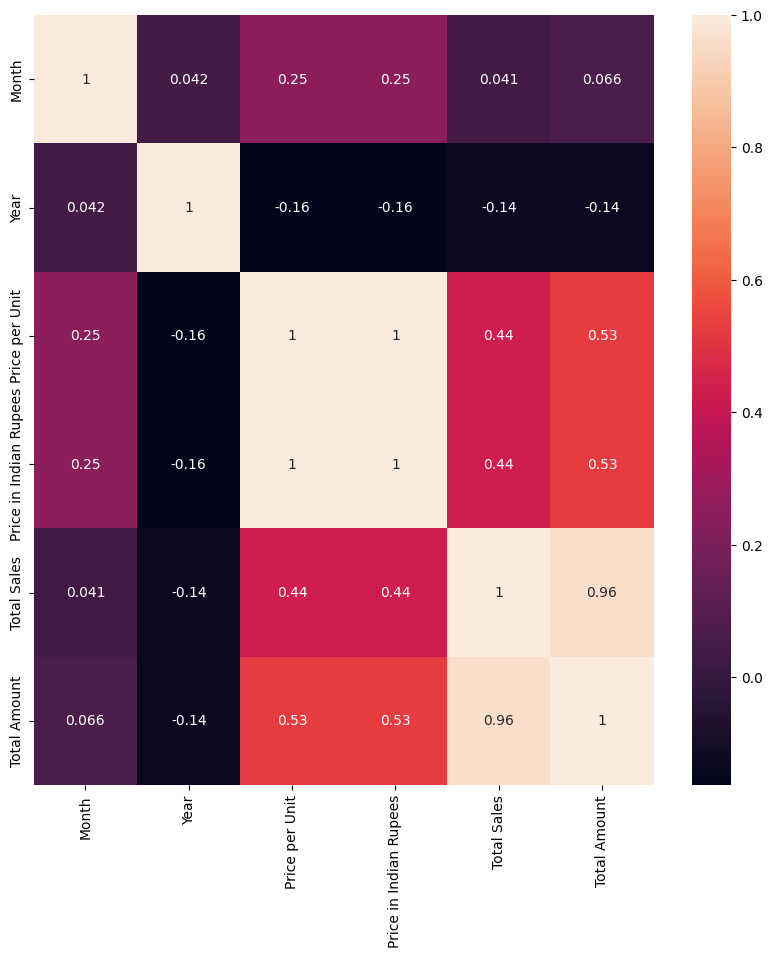

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [ ]:
df.dtypes

Invoice Date              datetime64[ns]
Day Name                          object
Month Name                        object
Month                              int32
Year                               int32
Product                           object
Product_category                  object
Gender                            object
Region                            object
Retailer                          object
Sales Method                      object
State                             object
Price per Unit                     int64
Price in Indian Rupees           float64
Price_category                    object
Total Sales                        int64
Total Amount                       int64
dtype: object

Starting

Text(0.5, 1.0, 'Average price of products in each states')

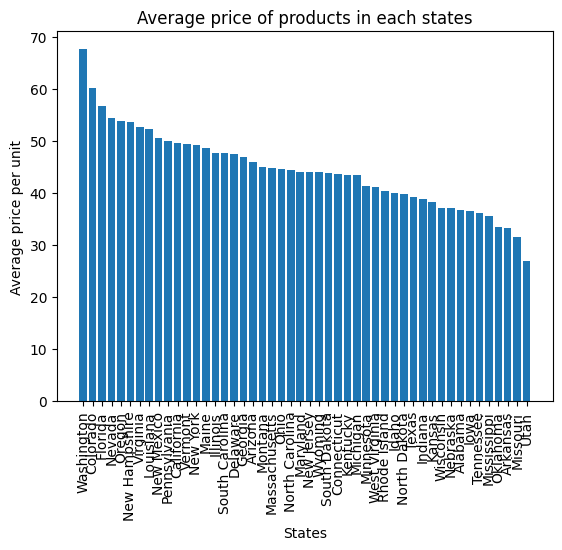

In [ ]:
x=df.groupby('State')[['Price per Unit']].mean().sort_values('Price per Unit',ascending=False)
plt.bar(x.index,x['Price per Unit'])
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel('Average price per unit')
plt.title('Average price of products in each states')

total sales in each months


Text(0.5, 1.0, 'Total sales in each months')

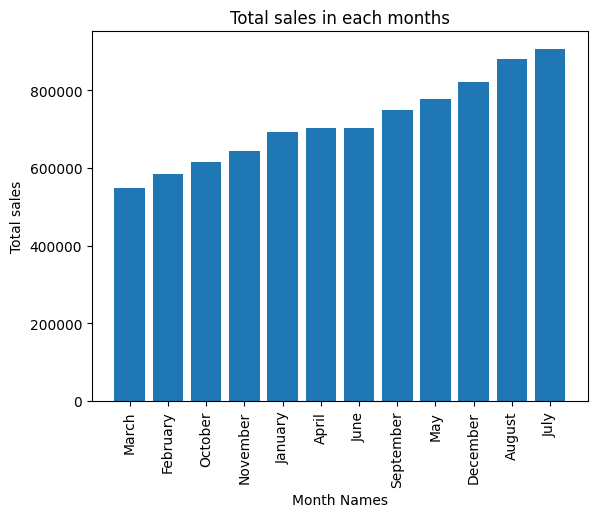

In [ ]:
x=df.groupby(['Month Name'])[['Total Sales']].sum().sort_values('Total Sales')
x
plt.bar(x.index,x["Total Sales"])
plt.xticks(rotation=90)
plt.xlabel("Month Names")
plt.ylabel('Total sales')
plt.title('Total sales in each months')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'July'),
  Text(6, 0, 'August'),
  Text(7, 0, 'September'),
  Text(8, 0, 'October'),
  Text(9, 0, 'November'),
  Text(10, 0, 'December'),
  Text(11, 0, 'June')])

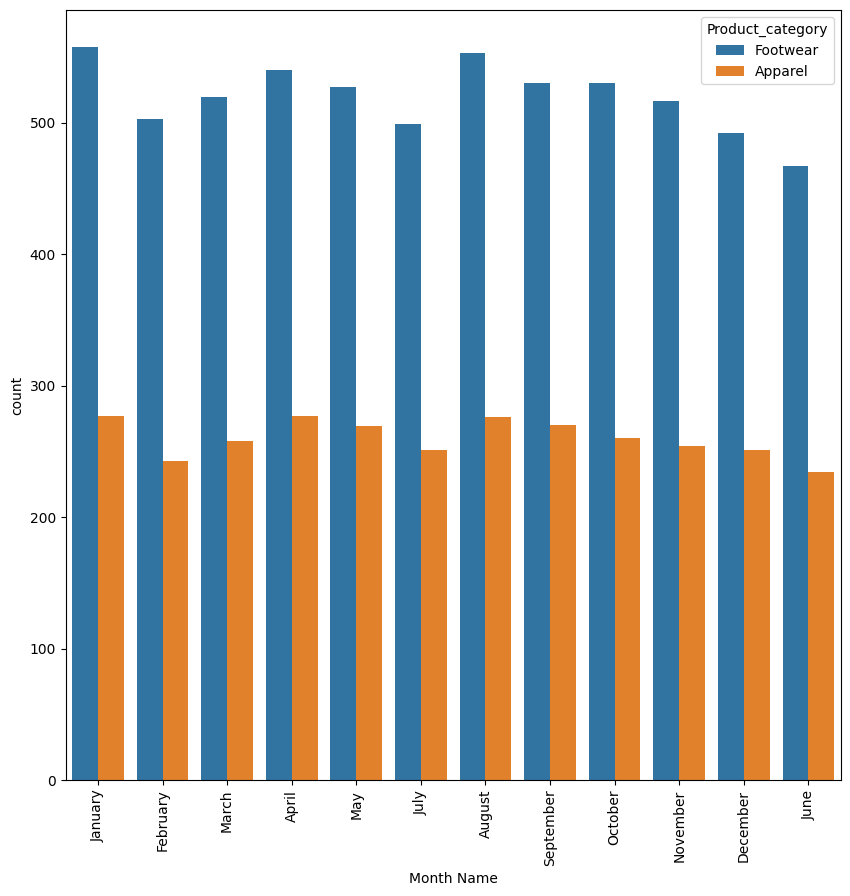

In [ ]:

import seaborn as sns
plt.figure(figsize=(10,10))
sns.countplot(x=df['Month Name'],hue=df['Product_category'])
plt.xticks(rotation=90)

In [ ]:
# Day name vs average(price per unit)
# month name,product vs average(price per unit) 
# sales method vs average(price per unit) 
# month name vs sum(total sales) --- which month is having the most slaes
# 

Text(0.5, 1.0, 'Total sales among each products')

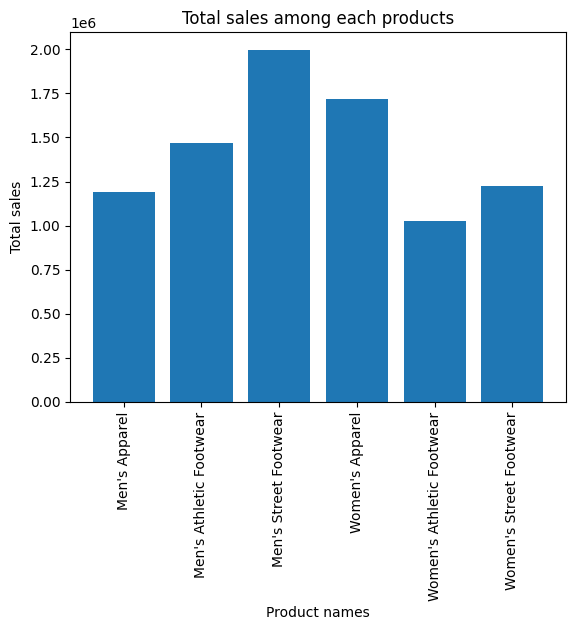

In [ ]:
x=df.groupby('Product')['Total Sales'].sum()
plt.bar(x.index,x)
plt.xticks(rotation=90)
plt.xlabel("Product names")
plt.ylabel('Total sales')
plt.title('Total sales among each products')

Text(0.5, 1.0, 'Total sales among each sales methods')

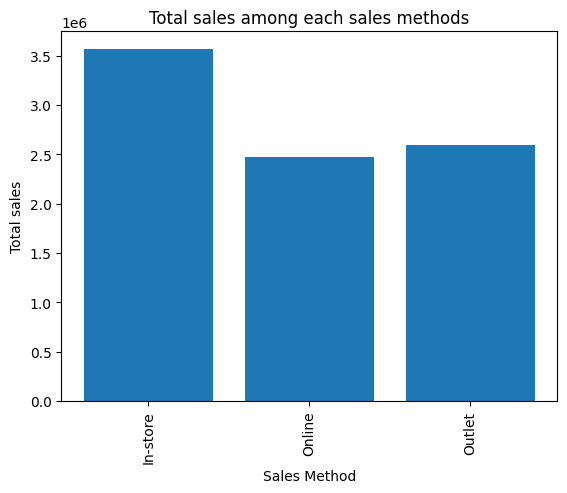

In [ ]:
y=df.groupby(['Sales Method'])['Total Sales'].sum()
plt.bar(y.index,y)
plt.xticks(rotation=90)
plt.xlabel("Sales Method")
plt.ylabel('Total sales')
plt.title('Total sales among each sales methods')

<Axes: xlabel='Gender', ylabel='count'>

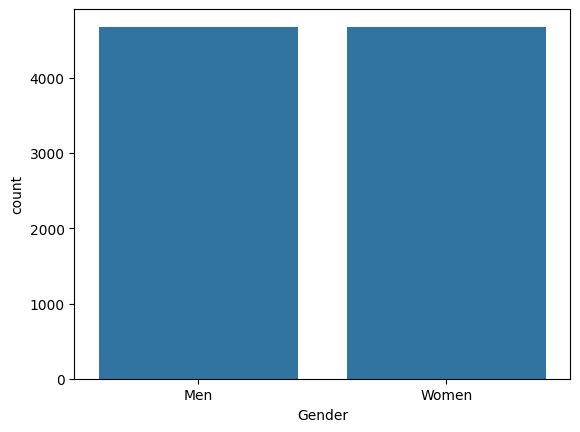

In [ ]:
sns.countplot(x=df['Gender'])

<BarContainer object of 9356 artists>

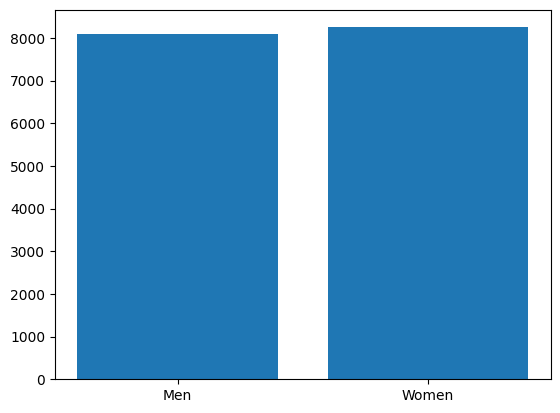

In [ ]:
plt.bar(df['Gender'],df['Total Sales'])

Text(0.5, 1.0, 'Total sales among each genders')

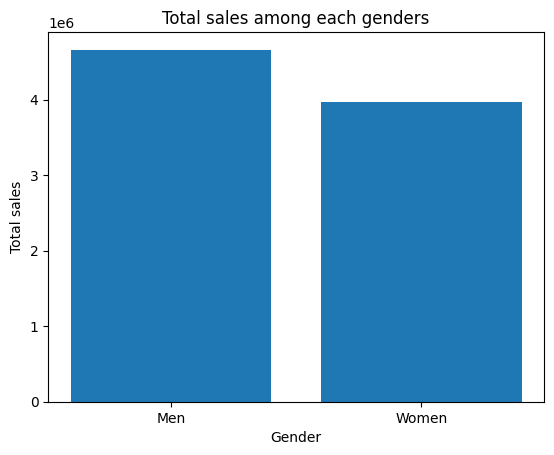

In [ ]:
x=df.groupby('Gender')['Total Sales'].sum()
plt.bar(x.index,x)
plt.xlabel("Gender")
plt.ylabel('Total sales')
plt.title('Total sales among each genders')

Univariate analysis


Total sales among products

In [ ]:
df.groupby('Product')[['Total Sales']].sum()

,Total Sales
Product,
Men's Apparel,1192682
Men's Athletic Footwear,1468116
Men's Street Footwear,1999192
Women's Apparel,1720630
Women's Athletic Footwear,1023899
Women's Street Footwear,1224756


Average price per unit for each category


In [ ]:
df.groupby('Product_category')['Price per Unit'].mean()


Product_category
Apparel     50.498718
Footwear    41.866260
Name: Price per Unit, dtype: float64

Total amount generated per retailers

In [ ]:
df.groupby('Retailer')[['Total Amount']].sum().sort_values(by='Total Amount',ascending=False)

,Total Amount
Retailer,
West Gear,145645230
Foot Locker,108568209
Sports Direct,88954123
Kohl's,52023841
Walmart,39869482
Amazon,34634912


Bivariate Analysis

Average price per unit of each product categories among each genders


In [ ]:
df.groupby(['Product_category','Gender'])[['Price per Unit']].mean()

Price per Unit
Product_category Gender                
Apparel          Men          49.870513
                 Women        51.126923
Footwear         Men          43.520833
                 Women        40.209564

Average price of each products among each sales method

In [ ]:
df.groupby(['Product','Sales Method'])[['Price per Unit']].mean().sort_values(
                                                                              ['Product','Price per Unit'],
                                                                              ascending=[True,False])

Price per Unit
Product                   Sales Method                
Men's Apparel             In-store           54.896907
                          Online             51.058228
                          Outlet             44.858038
Men's Athletic Footwear   In-store           47.110727
                          Online             43.878635
                          Outlet             39.916667
Men's Street Footwear     In-store           49.224138
                          Online             44.710493
                          Outlet             38.958246
Women's Apparel           In-store           55.775862
                          Online             52.188369
                          Outlet             46.559499
Women's Athletic Footwear In-store           43.344828
                          Online             41.250951
                          Outlet             38.100629
Women's Street Footwear   In-store           42.517241
                          Online             39.996207
                          Outlet             37.651357

Total sales of each Retailers among each regions

In [ ]:
df.groupby(['Retailer','Region'])[['Total Sales']].sum().sort_values(by=['Retailer','Total Sales'],ascending=[True,False])

Total Sales
Retailer      Region                
Amazon        Northeast       362664
              Midwest         168370
              Southeast       108273
              South             4092
Foot Locker   Northeast       653330
              Southeast       596707
              Midwest         479932
              West            244260
              South            93081
Kohl's        West            623057
              Midwest         222315
              Northeast       140329
              South            35525
Sports Direct South           652618
              Southeast       541817
              Midwest         262095
              Northeast       247010
              West             86305
Walmart       South           330513
              Southeast       210066
              Northeast       137123
West Gear     West           1375571
              South           330893
              Northeast       322973
              Midwest         225433
              Southeast       174923

Multivariate 

Average price per unit of each products among each retailers with different sales method

In [ ]:
df.groupby(['Product','Retailer','Sales Method'])[['Price per Unit']].mean()


Price per Unit
Product                 Retailer    Sales Method                
Men's Apparel           Amazon      In-store           61.500000
                                    Online             53.088608
                                    Outlet             50.000000
                        Foot Locker In-store           51.710526
                                    Online             50.982063
...                                                          ...
Women's Street Footwear Walmart     Online             40.720930
                                    Outlet             39.136364
                        West Gear   In-store           44.579832
                                    Online             42.663043
                                    Outlet             39.072165

[108 rows x 1 columns]

Total sales per product, region, and retailer

In [ ]:
df.groupby(['Product', 'Region', 'Retailer'])[['Total Sales']].sum()


Total Sales
Product                 Region    Retailer                  
Men's Apparel           Midwest   Amazon               25672
                                  Foot Locker          60947
                                  Kohl's               29215
                                  Sports Direct        33914
                                  West Gear            31532
...                                                      ...
Women's Street Footwear Southeast West Gear            29497
                        West      Foot Locker          42952
                                  Kohl's               92463
                                  Sports Direct        17194
                                  West Gear           217221

[154 rows x 1 columns]

Average price generated per state, sales method, and sales method

In [ ]:
df.groupby(['State', 'Retailer', 'Sales Method'])[['Price per Unit']].mean()


Price per Unit
State     Retailer      Sales Method                
Alabama   Amazon        Online             34.500000
                        Outlet             31.250000
          Sports Direct Online             39.220588
                        Outlet             35.801471
Arizona   Foot Locker   Online             51.288136
...                                              ...
Wisconsin West Gear     Online             35.986111
Wyoming   Foot Locker   In-store           42.307692
                        Online             40.153846
          Kohl's        In-store           45.847458
                        Online             43.220339

[210 rows x 1 columns]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'July'),
  Text(6, 0, 'August'),
  Text(7, 0, 'September'),
  Text(8, 0, 'October'),
  Text(9, 0, 'November'),
  Text(10, 0, 'December'),
  Text(11, 0, 'June')])

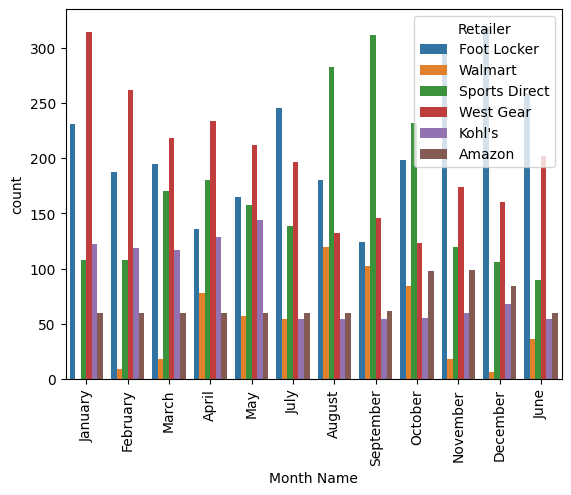

In [214]:
sns.countplot(x=df['Month Name'],hue=df['Retailer'])
plt.xticks(rotation=90)

In [203]:
df

,Invoice Date,Month,Day Name,Year,Product,Product_category,Gender,Region,Retailer,Sales Method,State,Price per Unit,Price in Indian Ruppees,Total Sales,Total Amount,Price_category,Month Name
0,2020-01-01,1,Wednesday,2020,Men's Street Footwear,Footwear,Men,Northeast,Foot Locker,In-store,New York,50,4367.00,6000,300000,Mid-range,January
1,2020-01-02,1,Thursday,2020,Men's Athletic Footwear,Footwear,Men,Northeast,Foot Locker,In-store,New York,50,4367.00,5000,250000,Mid-range,January
2,2020-01-03,1,Friday,2020,Women's Street Footwear,Footwear,Women,Northeast,Foot Locker,In-store,New York,40,3493.60,4000,160000,Mid-range,January
3,2020-01-04,1,Saturday,2020,Women's Athletic Footwear,Footwear,Women,Northeast,Foot Locker,In-store,New York,45,3930.30,3825,172125,Mid-range,January
4,2020-01-05,1,Sunday,2020,Men's Apparel,Apparel,Men,Northeast,Foot Locker,In-store,New York,60,5240.40,5400,324000,Mid-range,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,2021-07-06,7,Tuesday,2021,Women's Athletic Footwear,Footwear,Women,West,West Gear,Outlet,Idaho,38,3318.92,60,2280,Mid-range,July
9356,2021-04-05,4,Monday,2021,Women's Street Footwear,Footwear,Women,West,West Gear,Outlet,Idaho,19,1659.46,31,589,Affordable,April
9357,2021-05-05,5,Wednesday,2021,Women's Street Footwear,Footwear,Women,West,West Gear,Outlet,Idaho,18,1572.12,33,594,Affordable,May
9358,2021-06-04,6,Friday,2021,Women's Street Footwear,Footwear,Women,West,West Gear,Outlet,Idaho,34,2969.56,63,2142,Affordable,June
